# Lending Club Case Study 

### Group facilitator: Rajeev Ranjan
### Group Memober: Rajesh Sapkota

### Case Study Brief :
Lending club is evaluating borrowers based on some attributes and recommend the investors to release or fund the full or reduced loan amount to the borrower. Investor has the final right to accept or reject the loan.

### There can be 2 cases :-

#### 1. Loan accepted: In this scenario, there can be 3 customer types :-

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

#### 2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Not in the provided dataset

### Objectives:

To find the driving factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment. 


### Data
Loan data from the lending club and a Data dictionary explaining the columns description was provided.


#### Major assumption for Data analysis :--- Only the the data available at the loan request time is utilized for EDA analysis. The borrower attributes recorded after loan approval will be removed.

We will start with importing the important libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Understanding

## Loading the provided Lending club case study CSV file



In [2]:
loan=pd.read_csv(r'C:\Users\rajee\OneDrive\Desktop\Upgrad ML & AI Course\1. Main course\4. Lending club case study\loan.csv', low_memory=False)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 2. Data Cleaning

## From above Data understanding functions, it is very clear that there are many NaN columns at the end 

### We need to drop all these columns using dropna function



In [9]:
loan.dropna(axis=1,how='all',inplace=True)

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,16-Jun,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### From the above action, the number of columns reduced from 111 to 57 only

In [10]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### The columns with very high number of null values (>30%) and not usefull for our target variable analysis can again be removed

In [11]:
loan.dropna(axis=1,how='all',thresh=loan.shape[0]*0.7,inplace=True)

In [12]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Now we need to identify the unnecessary columns which are not required for our analysis

### All the borrower behaviour attributes which are tracked after the loan approval are not needed for this task.

### Also column "initial_list_status" with same value "f" can be removed

### we will focus only on parameters applicable before approval of loan, in order to identify the driving parameters for defaulters




In [14]:
loan.drop(loan.iloc[:,24:44], axis = 1, inplace = True)

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Removing columns having same value in each entry



In [16]:
loan=loan[loan.columns[loan.nunique() > 1]]
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

### Removing Rows containing loan status as "current", as it does not give any confirm insight towards the defualters 



In [17]:
loan=loan[loan["loan_status"].str.contains("Current")==False]

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

#### 1140 entries with loan status as current were removed with above action


## Removing funded_amt, funded_amnt_inv, id, member_id, url and last credit pull....as they are not required for analysis
## Only loan_amnt will be used for analysis, as this was asked for approval



In [19]:
loan.drop(loan.iloc[:,0:2], axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  url                

In [20]:
loan.drop(loan.iloc[:,1:3], axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  url                   38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title              

In [21]:
loan.drop(loan.columns[[13,19]], axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

### Now we have to change the object data types to int or float wherever possible



In [22]:
loan['int_rate']=loan['int_rate'].str.rstrip('%')
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,bike,309xx,GA,1.00,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0


In [23]:
loan['term']=loan['term'].str.rstrip('months')
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,bike,309xx,GA,1.00,0.0
2,2400,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0


In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [25]:
loan['int_rate']=loan['int_rate'].astype(float)
loan['term']=loan['term'].astype(int)

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  int32  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [27]:
loan.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

### removing rows with null values for some of the columns above

In [28]:
loan.dropna(axis=0,how='any',inplace=True)

In [29]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35473 non-null  int64  
 1   term                  35473 non-null  int32  
 2   int_rate              35473 non-null  float64
 3   installment           35473 non-null  float64
 4   grade                 35473 non-null  object 
 5   sub_grade             35473 non-null  object 
 6   emp_title             35473 non-null  object 
 7   emp_length            35473 non-null  object 
 8   home_ownership        35473 non-null  object 
 9   annual_inc            35473 non-null  float64
 10  verification_status   35473 non-null  object 
 11  issue_d               35473 non-null  object 
 12  loan_status           35473 non-null  object 
 13  purpose               35473 non-null  object 
 14  title                 35473 non-null  object 
 15  zip_code           

In [30]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### Converting emp_length to number or float dtype

In [31]:
loan['emp_length']=loan['emp_length'].str.extract('(\d+)')
loan['emp_length']=loan['emp_length'].astype(float)

loan.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
1,2500,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,bike,309xx,GA,1.00,0.0
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,917xx,CA,20.00,0.0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,11-Dec,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0.0
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,11-Dec,Fully Paid,car,Car Downpayment,900xx,CA,5.35,0.0


In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35473 non-null  int64  
 1   term                  35473 non-null  int32  
 2   int_rate              35473 non-null  float64
 3   installment           35473 non-null  float64
 4   grade                 35473 non-null  object 
 5   sub_grade             35473 non-null  object 
 6   emp_title             35473 non-null  object 
 7   emp_length            35473 non-null  float64
 8   home_ownership        35473 non-null  object 
 9   annual_inc            35473 non-null  float64
 10  verification_status   35473 non-null  object 
 11  issue_d               35473 non-null  object 
 12  loan_status           35473 non-null  object 
 13  purpose               35473 non-null  object 
 14  title                 35473 non-null  object 
 15  zip_code           

In [33]:
loan['loan_status']=loan['loan_status'].replace(['Fully Paid'],0)
loan['loan_status']=loan['loan_status'].replace(['Charged Off'],1)
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
1,2500,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,11-Dec,1,car,bike,309xx,GA,1.00,0.0
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,11-Dec,0,other,personel,917xx,CA,20.00,0.0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,11-Dec,0,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,11-Dec,0,debt_consolidation,Loan,280xx,NC,23.51,0.0
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,11-Dec,0,car,Car Downpayment,900xx,CA,5.35,0.0


### Creating a column for month from issue_d column. Year is same for all entries, so not usefull

In [34]:
loan['issue_m']=loan['issue_d'].str[-3:]
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_m
1,2500,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,11-Dec,1,car,bike,309xx,GA,1.00,0.0,Dec
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,11-Dec,0,other,personel,917xx,CA,20.00,0.0,Dec
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,11-Dec,0,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Dec
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,11-Dec,0,debt_consolidation,Loan,280xx,NC,23.51,0.0,Dec
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,11-Dec,0,car,Car Downpayment,900xx,CA,5.35,0.0,Dec


In [35]:
### Renamed column of loan status to default
loan=loan.rename(columns={'loan_status':'Default'})
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35473 non-null  int64  
 1   term                  35473 non-null  int32  
 2   int_rate              35473 non-null  float64
 3   installment           35473 non-null  float64
 4   grade                 35473 non-null  object 
 5   sub_grade             35473 non-null  object 
 6   emp_title             35473 non-null  object 
 7   emp_length            35473 non-null  float64
 8   home_ownership        35473 non-null  object 
 9   annual_inc            35473 non-null  float64
 10  verification_status   35473 non-null  object 
 11  issue_d               35473 non-null  object 
 12  Default               35473 non-null  int64  
 13  purpose               35473 non-null  object 
 14  title                 35473 non-null  object 
 15  zip_code           

# 3. Data Analysis

## 3a Univariate analysis

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


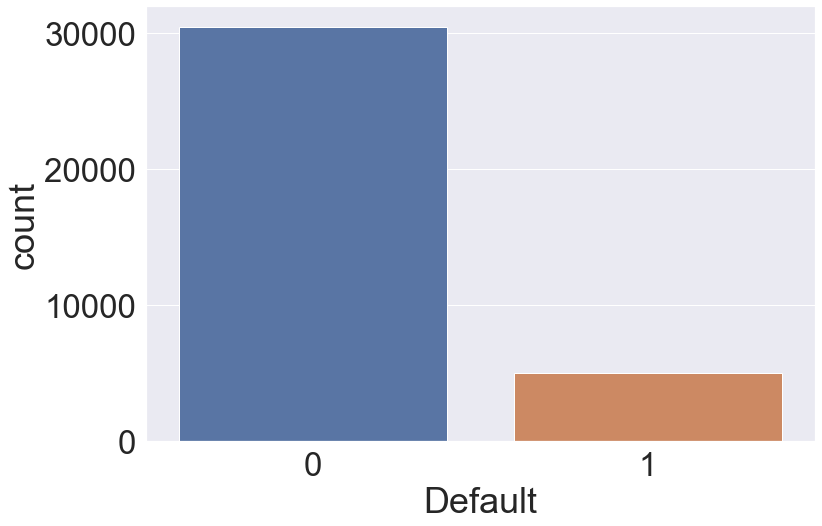

In [36]:
# Bar chart of ‘Defaults’ and ‘Non defaults’

plt.figure(figsize=(12,8))
sns.set(font_scale = 3)
sns.countplot(loan['Default'])
plt.show()

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='Default'>

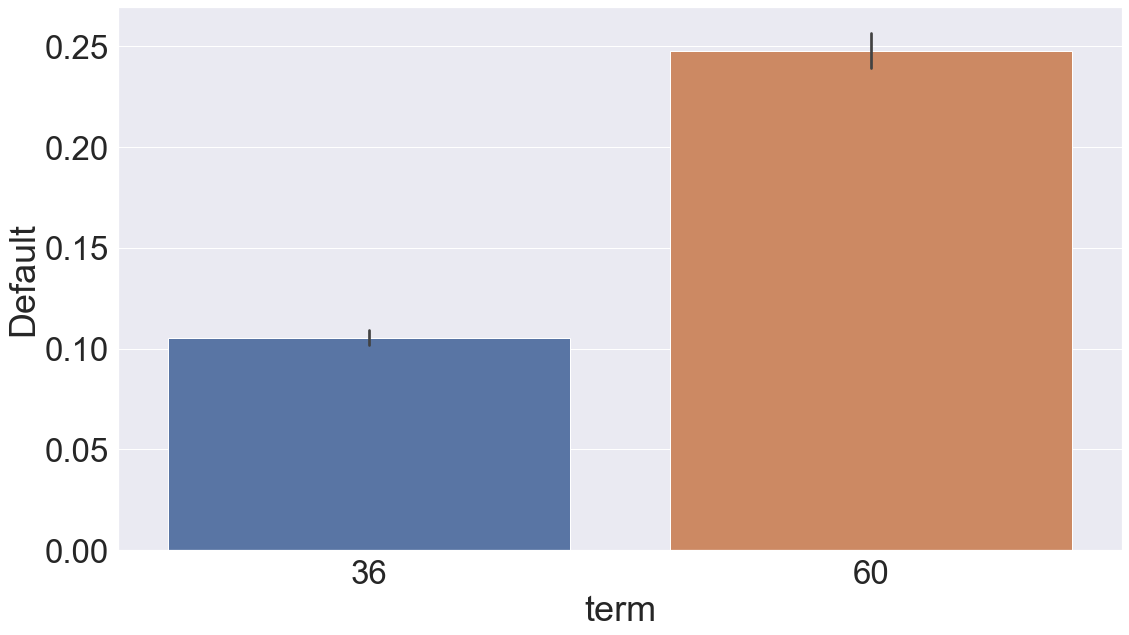

In [37]:
# univariate analysis for loan term

# More default rate in longer tenure loan

plt.figure(figsize=(18,10))
sns.barplot(loan['term'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='Default'>

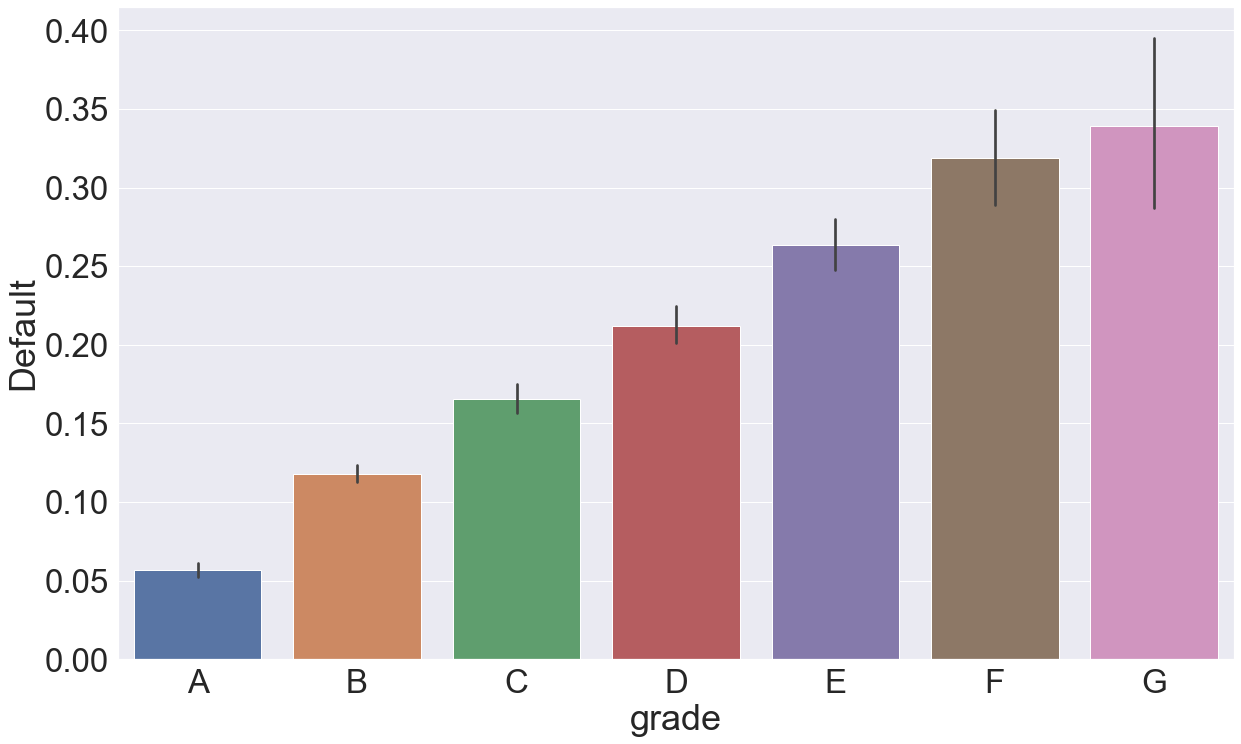

In [38]:
# univariate analysis for loan term

# More default rate in longer tenure loan

plt.figure(figsize=(20,12))
sns.barplot(loan['grade'],loan['Default'],data=loan,order=['A','B','C','D','E','F','G'])

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='Default'>

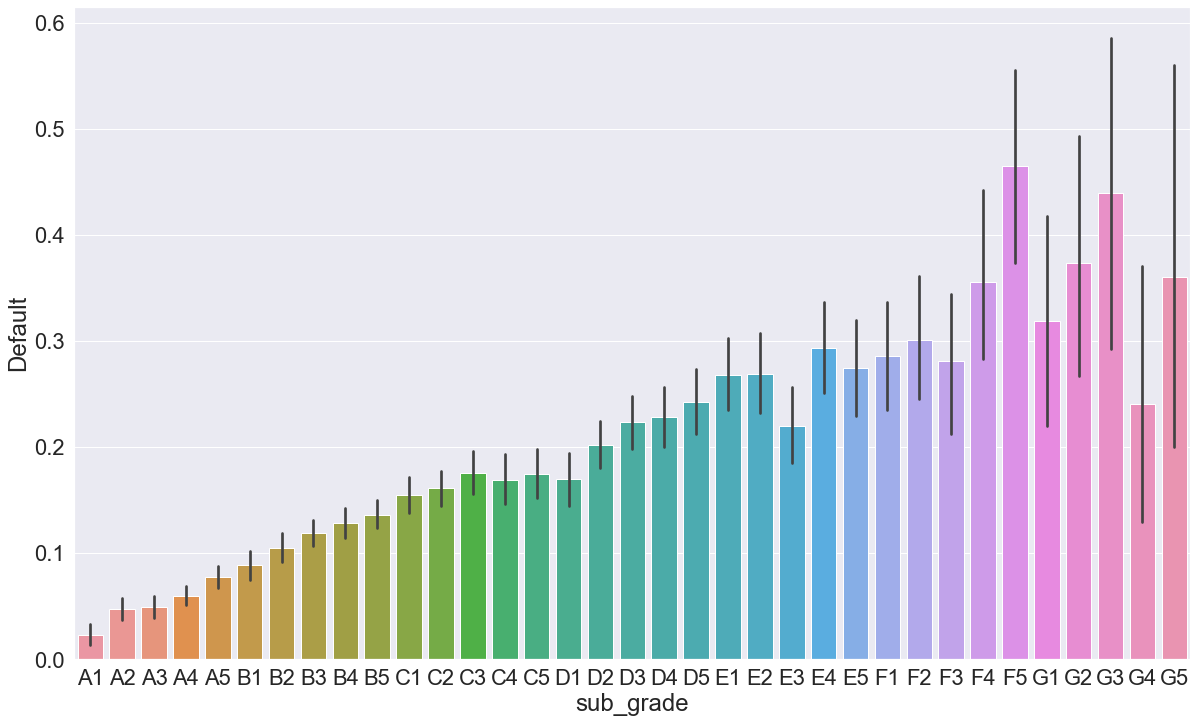

In [39]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 2)
sns.barplot(loan['sub_grade'],loan['Default'],data=loan,order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='Default'>

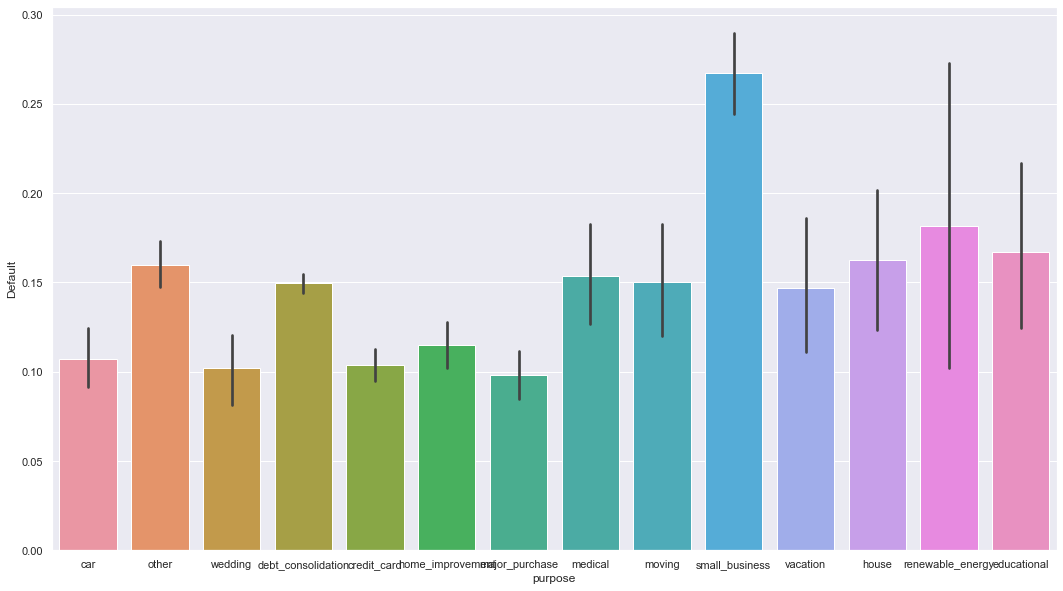

In [40]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 1)
sns.barplot(loan['purpose'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='addr_state', ylabel='Default'>

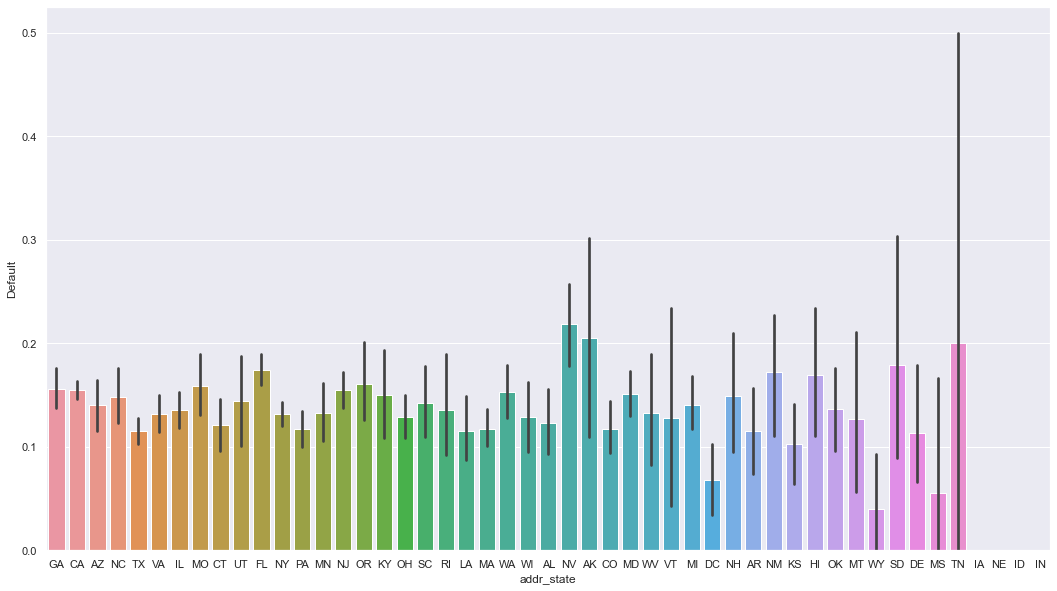

In [41]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 1)
sns.barplot(loan['addr_state'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='Default'>

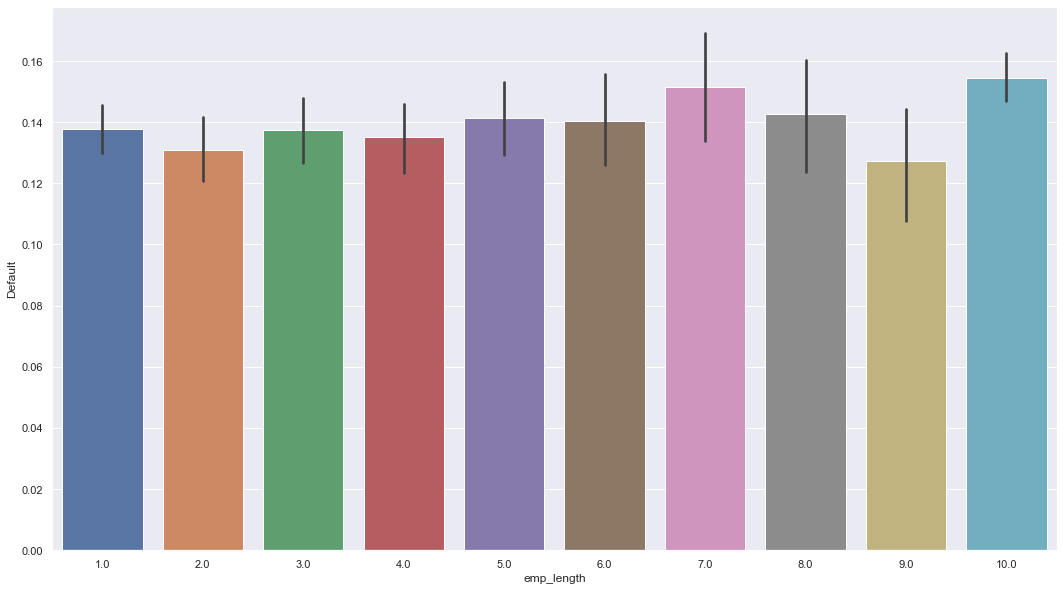

In [42]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 1)
sns.barplot(loan['emp_length'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='Default'>

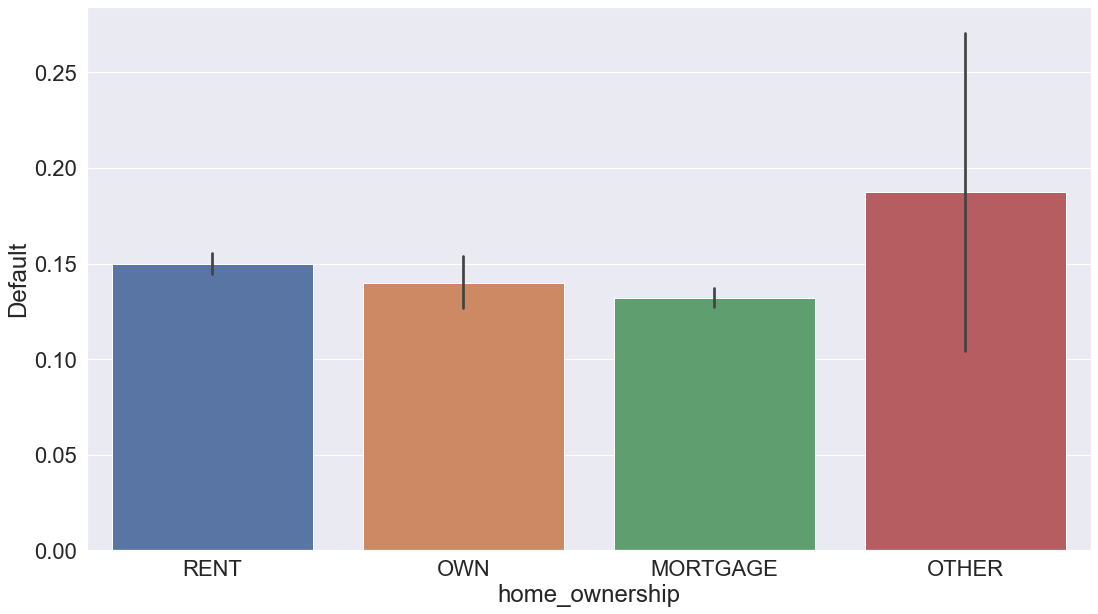

In [43]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['home_ownership'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='Default'>

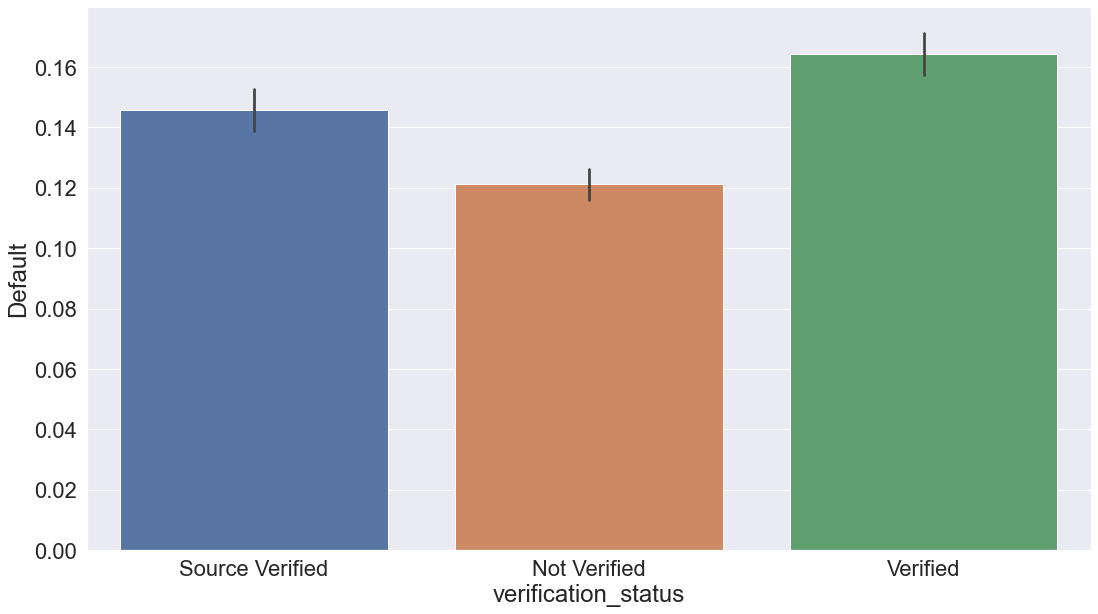

In [44]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['verification_status'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issue_m', ylabel='Default'>

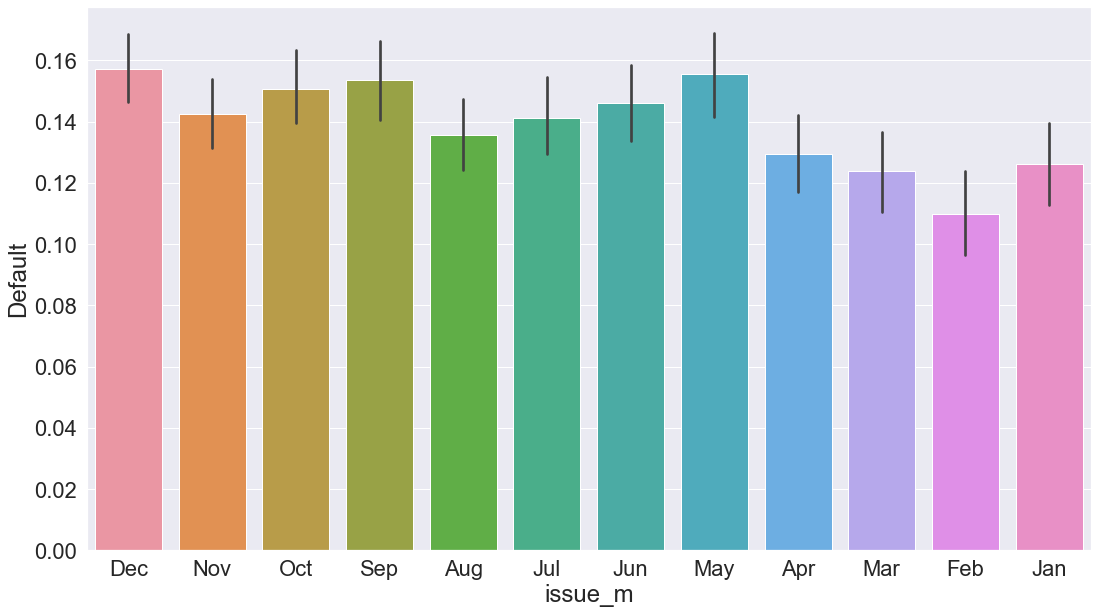

In [45]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['issue_m'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Default'>

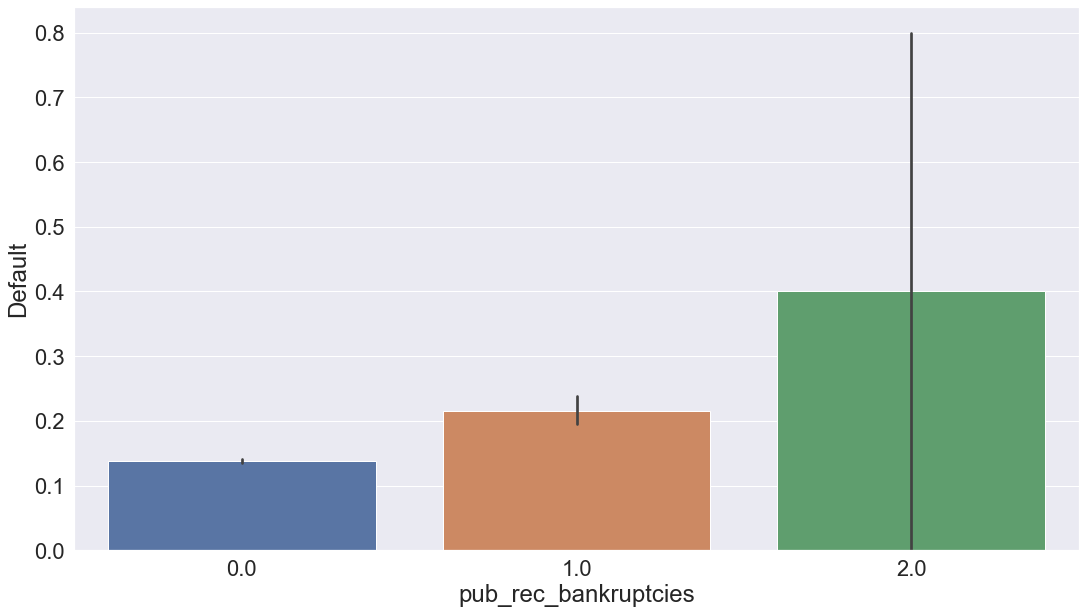

In [46]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['pub_rec_bankruptcies'],loan['Default'],data=loan)


C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='binloan_amnt', ylabel='Default'>

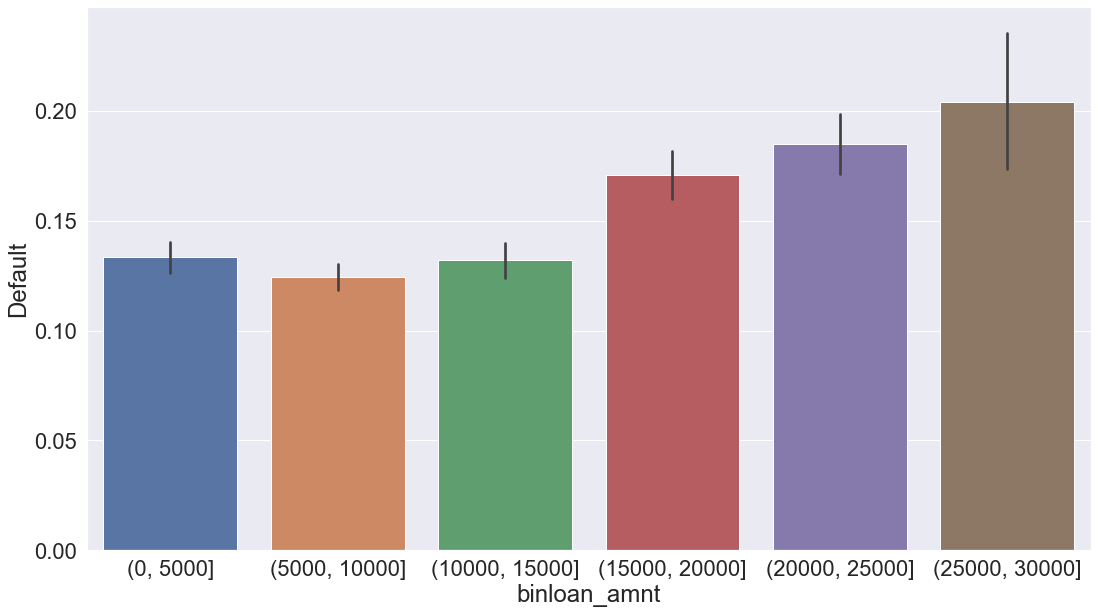

In [47]:
# univariate analysis for loan amount 

# Bigger loan request amounts have higher risk of default

loan['binloan_amnt']=pd.cut(loan['loan_amnt'],bins=range(0,35000,5000))
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['binloan_amnt'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='binint_rate', ylabel='Default'>

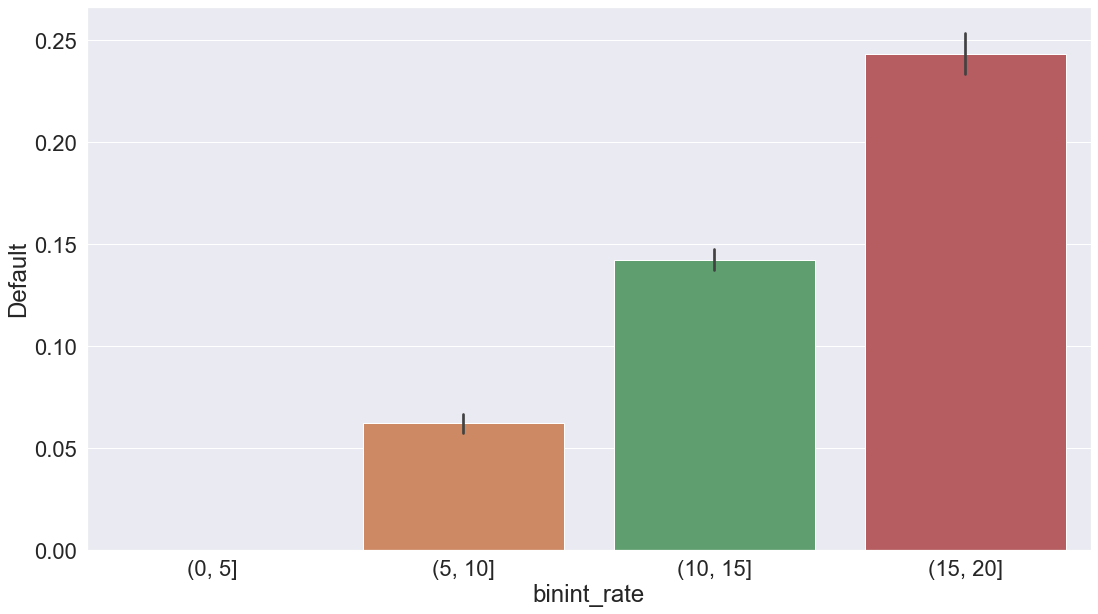

In [48]:
# univariate analysis for interest rates 

# higher Interest rates have higher risk of default

loan['binint_rate']=pd.cut(loan['int_rate'],bins=range(0,25,5))
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['binint_rate'],loan['Default'],data=loan)

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bindti', ylabel='Default'>

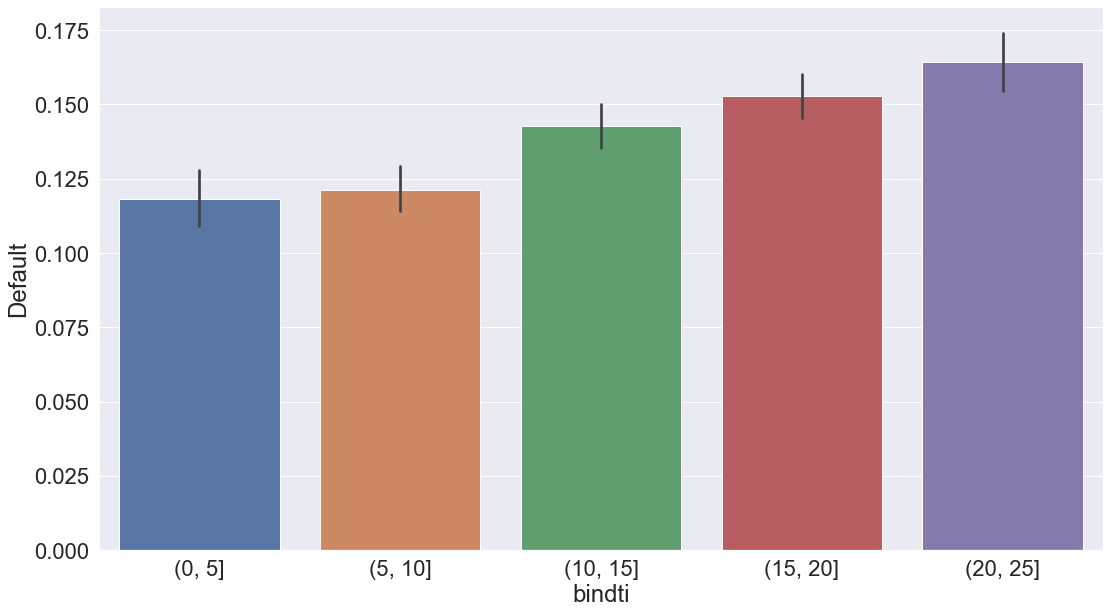

In [49]:
# univariate analysis for DTI 

# higher debt (compared to income) has higher risk of default

loan['bindti']=pd.cut(loan['dti'],bins=range(0,30,5))
plt.figure(figsize=(18,10))
sns.set(font_scale = 2)
sns.barplot(loan['bindti'],loan['Default'],data=loan)

## 3(b) Bivariate Analysis

<AxesSubplot:xlabel='term', ylabel='Default'>

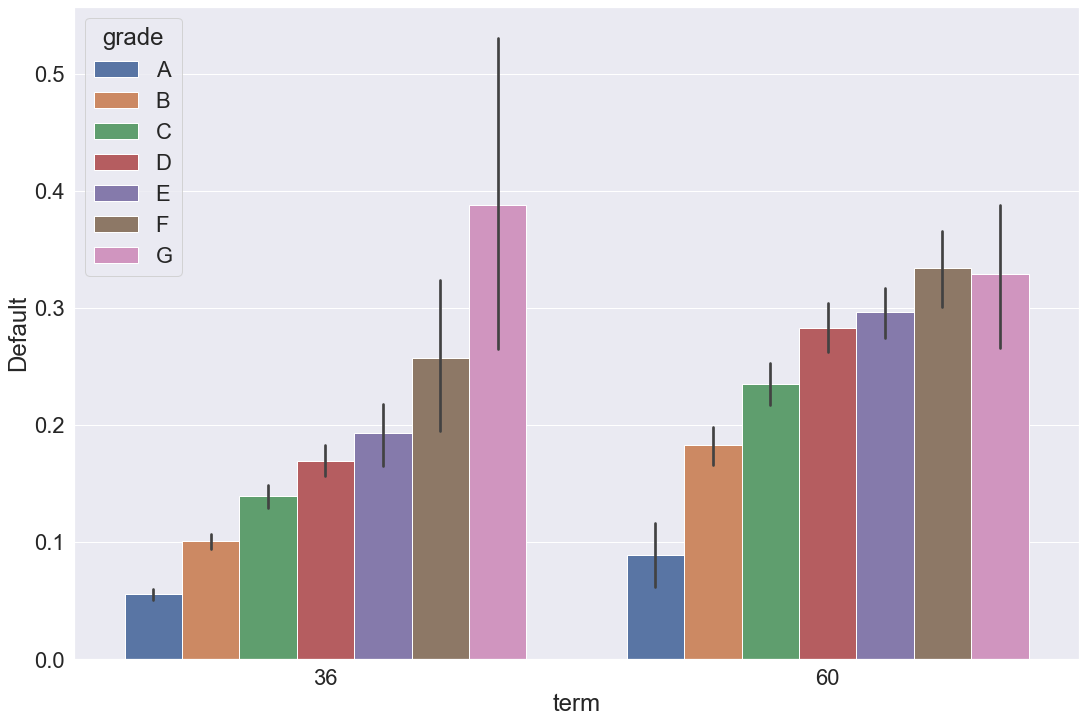

In [50]:
# bivariate analysis for loan term & grade
# Default rate increases from A to G grade for both kind of loan terms

plt.figure(figsize=(18,12))
sns.barplot(x=loan['term'],y=loan['Default'],hue=loan['grade'],data=loan,hue_order=['A','B','C','D','E','F','G'])

<AxesSubplot:xlabel='binloan_amnt', ylabel='Default'>

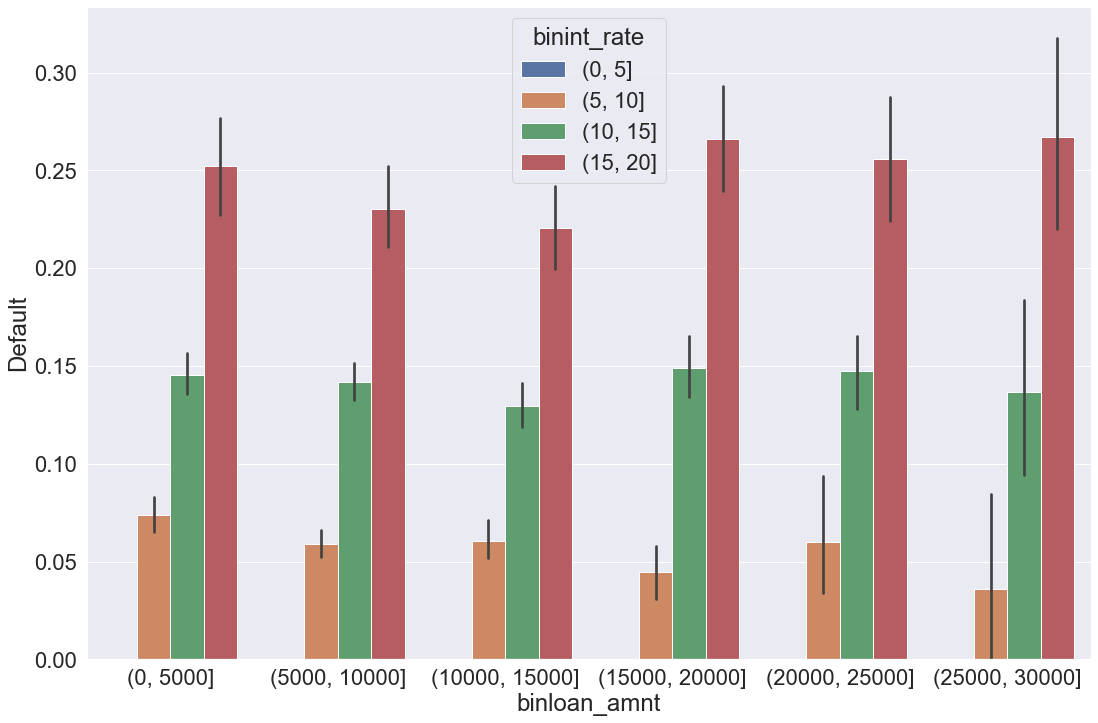

In [51]:
# bivariate analysis for loan amount and interest rate
# Default rate increases with higher interest rates for all the loan amount buckets
# However, with increasing loan amount, the rate of increase in default rate is not significant in a fixed interest bucket.
# It means that high interest rate is a more stronger indicator for default, compared to high loan amount

plt.figure(figsize=(18,12))
sns.barplot(x=loan['binloan_amnt'],y=loan['Default'],hue=loan['binint_rate'],data=loan)

<AxesSubplot:xlabel='purpose', ylabel='Default'>

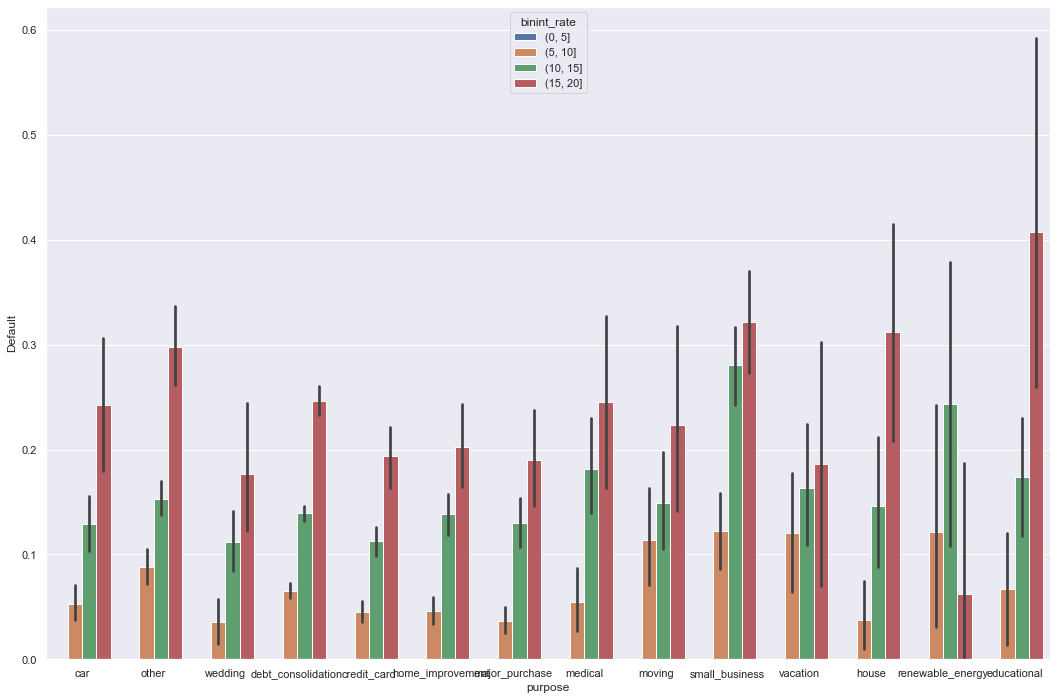

In [52]:
# bivariate analysis for purpose of loan and interest rate
# Default rate increase with higher interest rate for all purpose of loans.
# Small business have higher default rates at even lower interest rates
# Education purpose has a sudden jump in default rate with increasing interest rate to >15%

plt.figure(figsize=(18,12))
sns.set(font_scale = 1)
sns.barplot(x=loan['purpose'],y=loan['Default'],hue=loan['binint_rate'],data=loan)


<AxesSubplot:xlabel='grade', ylabel='Default'>

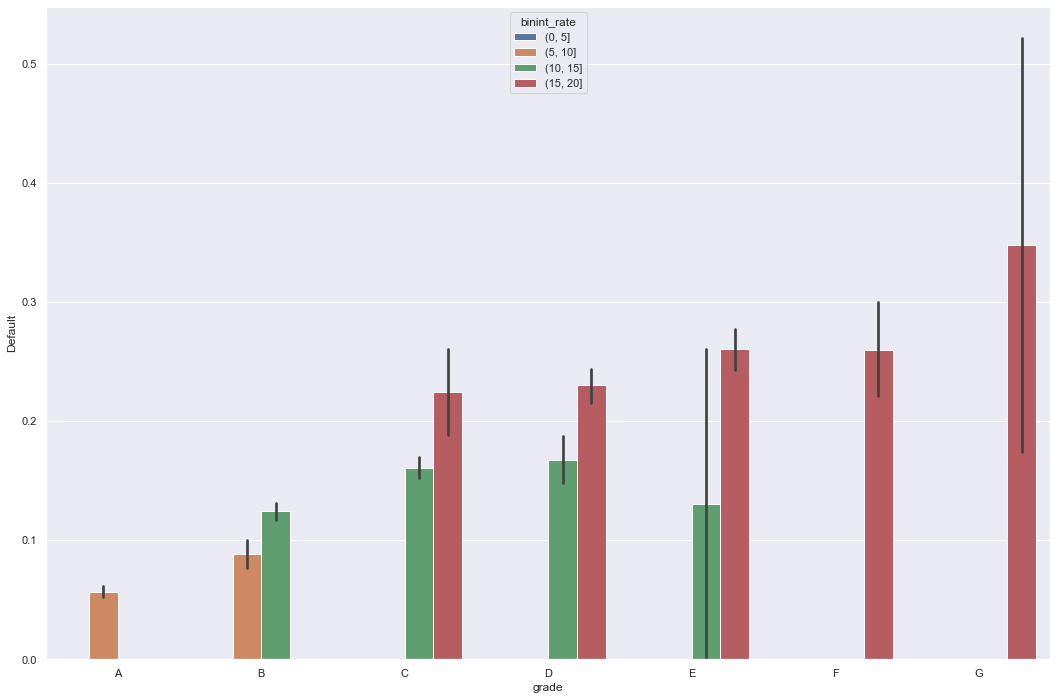

In [53]:
# bivariate analysis for grade and int rate
# Default rate increases with higher interest rates from A to G grade 
# However F & G grades are given loans on higher interest rates only

plt.figure(figsize=(18,12))
sns.barplot(x=loan['grade'],y=loan['Default'],hue=loan['binint_rate'],data=loan,order=['A','B','C','D','E','F','G'])

In [54]:
# checking data types in order to create heat map for numeric variables

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35473 non-null  int64   
 1   term                  35473 non-null  int32   
 2   int_rate              35473 non-null  float64 
 3   installment           35473 non-null  float64 
 4   grade                 35473 non-null  object  
 5   sub_grade             35473 non-null  object  
 6   emp_title             35473 non-null  object  
 7   emp_length            35473 non-null  float64 
 8   home_ownership        35473 non-null  object  
 9   annual_inc            35473 non-null  float64 
 10  verification_status   35473 non-null  object  
 11  issue_d               35473 non-null  object  
 12  Default               35473 non-null  int64   
 13  purpose               35473 non-null  object  
 14  title                 35473 non-null  object  
 15  zi

<AxesSubplot:>

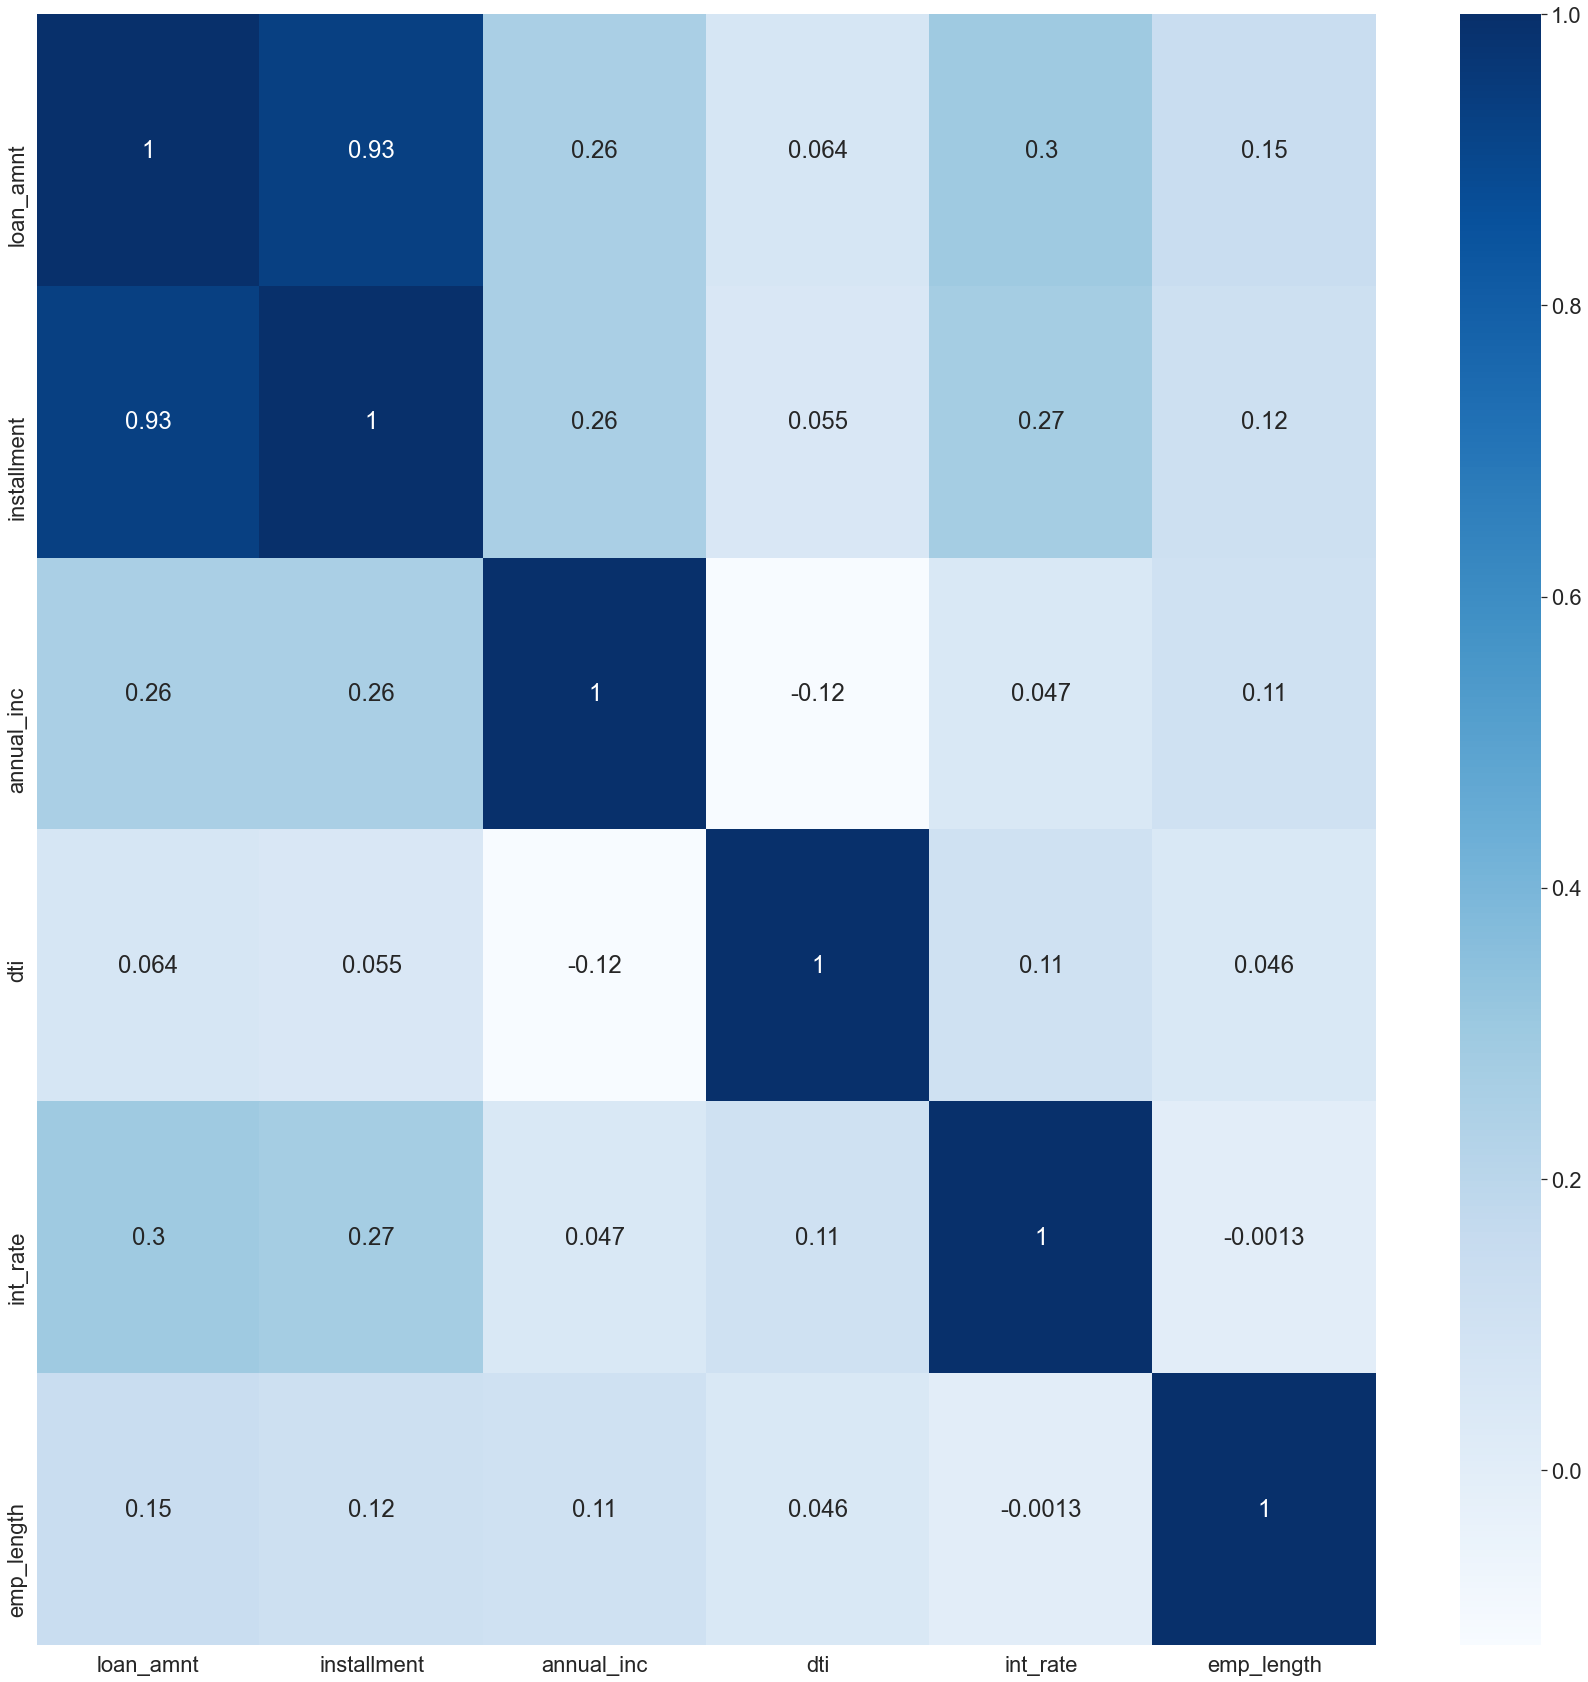

In [55]:
plt.figure(figsize=(30,30))
sns.set(font_scale = 2)
corr=loan[['loan_amnt','installment','annual_inc','dti','int_rate','emp_length']].corr()
sns.heatmap(corr,cmap="Blues",annot=True)

# 4. Final Recommendations

In [76]:
# Choosing important variables from the dataset
# Against each column, default rates are calculated and then the difference between max and min default rate is calculated for that column
# A column variable having bigger difference has a stronger relation to finding defaulters

res={}
    
for col in ['int_rate','installment','emp_length','annual_inc','bindti','binloan_amnt','pub_rec_bankruptcies','addr_state','grade','term','home_ownership','verification_status','issue_m']:
    loanx=loan.groupby(col)['Default'].mean()
    res[col]=max(loanx)-min(loanx)
    
pd.DataFrame(res.items()).sort_values(1,ascending=False)

,0,1
0,int_rate,1.000000
1,installment,1.000000
3,annual_inc,1.000000
8,grade,0.282415
6,pub_rec_bankruptcies,0.261782
7,addr_state,0.218962
9,term,0.142360
5,binloan_amnt,0.079681
10,home_ownership,0.055354
12,issue_m,0.047661


#### From above, the important variables are chosen for final recommendations 
